In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams["figure.facecolor"] = "w"

sns.set_style('whitegrid')

#### Данные

In [3]:
data = pd.read_csv('measurements.csv', decimal=',')

FileNotFoundError: [Errno 2] No such file or directory: 'measurements.csv'

In [4]:
data.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


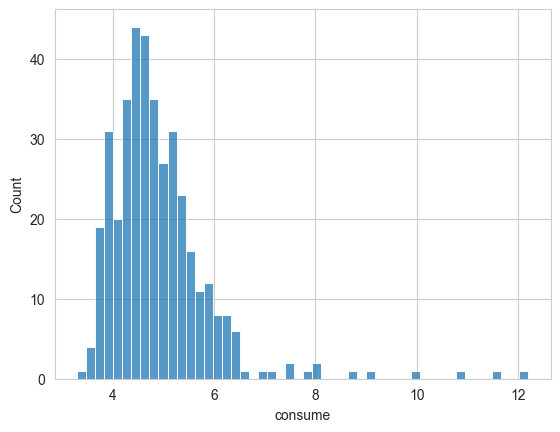

In [5]:
sns.histplot(data.consume, bins=50)
plt.show()

In [6]:
len(data.consume)

388

Проверяем нормальность

In [7]:
from scipy.stats import shapiro

shapiro(data.consume)

ShapiroResult(statistic=0.7749732732772827, pvalue=1.0203466473862174e-22)

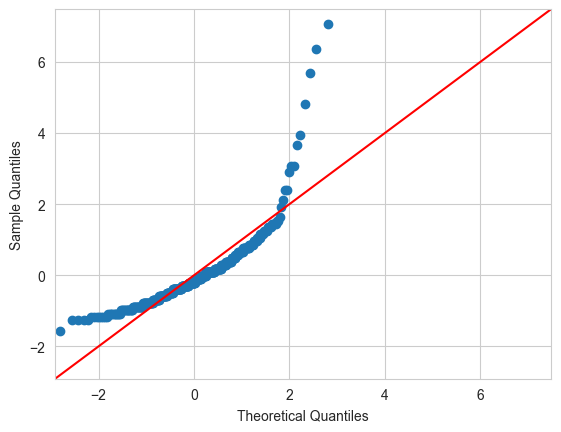

In [8]:
import statsmodels.api as sm

values = (data.consume - data.consume.mean()) / data.consume.std()
sm.qqplot(values, line='45')
plt.show()

#### Критерий знаков

In [9]:
from scipy.stats import binom

m = 4.85
N = len(data.consume)
tN = (data.consume > m).sum()

binom(n=N, p=0.5).cdf(tN) * 2

0.028905970266677752

In [10]:
from statsmodels.stats.descriptivestats import sign_test

sign_test(data.consume, mu0=m)

(-22.0, 0.028905970266677752)

#### Ранги

In [11]:
sample = data.head(10).copy()
sample['consume_rank'] = sample.consume.rank()

In [12]:
sample[['consume', 'consume_rank']]

,consume,consume_rank
0,5.0,5.5
1,4.2,2.0
2,5.5,8.0
3,3.9,1.0
4,4.5,4.0
5,6.4,9.5
6,4.4,3.0
7,5.0,5.5
8,6.4,9.5
9,5.3,7.0


#### Табличные распределения

In [13]:
n1, n2 = 3, 5
inds = np.arange(1, n1 + n2 + 1, 1)
n_iter = 100000
rns = []

for _ in range(n_iter):
    inds_1 = np.random.choice(inds, size=n1, replace=False)
    rn = np.sum(inds_1)
    rns.append(rn)

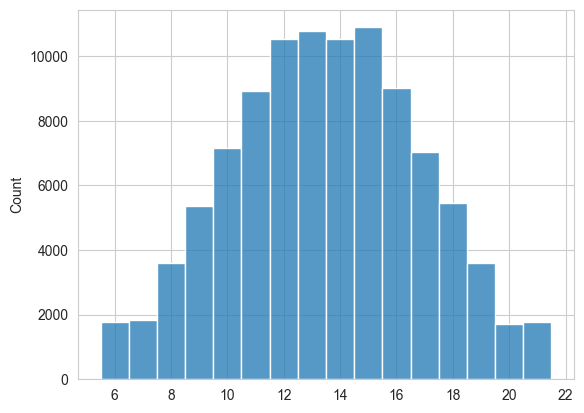

In [14]:
sns.histplot(rns, bins=np.arange(1+2+3-0.5, 6+7+8+1.5, 1))
plt.show()

In [15]:
n1, n2 = 20, 25
inds = np.arange(1, n1 + n2 + 1, 1)
n_iter = 100000
rns = []

for _ in range(n_iter):
    inds_1 = np.random.choice(inds, size=n1, replace=False)
    rn = np.sum(inds_1)
    rns.append(rn)

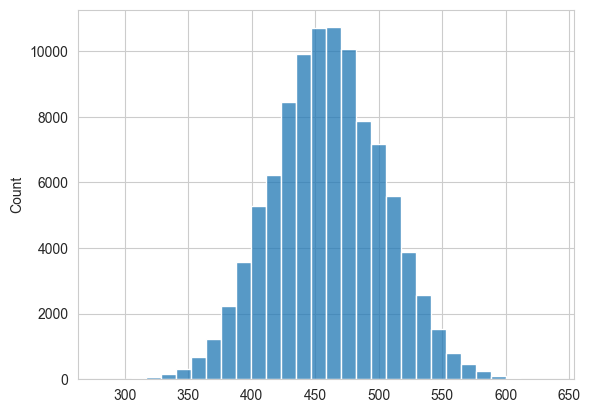

In [16]:
sns.histplot(rns, bins=30)
plt.show()

#### Критерий Манна-Уитни-Уилкоксона

In [17]:
data.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [18]:
data['consume_rank'] = data.consume.rank()
rn = data[data.gas_type == 'SP98'].consume_rank.sum()

N1 = (data.gas_type == 'SP98').sum()
N2 = (data.gas_type == 'E10').sum()

In [19]:
from scipy.stats import norm

mu = N1 * (N1 + N2 + 1) / 2
sigma = (N1 * N2 * (N1 + N2 + 1) / 12) ** 0.5

norm(loc=mu, scale=sigma).cdf(rn) * 2

0.20476310569298284

In [20]:
from scipy.stats import mannwhitneyu

mannwhitneyu(
    x=data[data.gas_type == 'SP98'].consume,
    y=data[data.gas_type == 'E10'].consume
)

MannwhitneyuResult(statistic=16861.0, pvalue=0.20446517696178945)

In [21]:
# mannwhitneyu(x=X1, y=X2, method='exact')  # cлишком долго

In [22]:
# mannwhitneyu(x=X1, y=X2, method='asymptotic')